In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib import cm
import os
%matplotlib inline


### 1. Load aggregate data

In [2]:
df = pd.read_pickle('yellow_tripdata_2016-05.pkl')

In [3]:
df.shape

(1860000, 3)

In [4]:
df.head()

,Count,Region,Time
0,0.0,1.0,0.0
1,0.0,2.0,0.0
2,0.0,3.0,0.0
3,0.0,4.0,0.0
4,0.0,5.0,0.0


rides_sum=df.groupby('Region')['Count'].sum()

In [7]:
print 'Number of cells from which there were zero rides in May 2016: ',len(rides_sum) - np.count_nonzero(rides_sum)

Number of cells from which there were zero rides in May 2016:  1283


In [13]:
coords=pd.read_csv(os.path.join('C:/Users/akuritsyn/Documents/Python Scripts\ML_MIPT_6/Taxi','regions.csv'),sep=';')
coords.head()

,region,west,east,south,north
0,1,-74.25559,-74.244478,40.496120,40.504508
1,2,-74.25559,-74.244478,40.504508,40.512896
2,3,-74.25559,-74.244478,40.512896,40.521285
3,4,-74.25559,-74.244478,40.521285,40.529673
4,5,-74.25559,-74.244478,40.529673,40.538061


### 2.-3. Static map of New York

c:\users\akuritsyn\appdata\local\continuum\anaconda2\lib\site-packages\mpl_toolkits\basemap\__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
c:\users\akuritsyn\appdata\local\continuum\anaconda2\lib\site-packages\mpl_toolkits\basemap\__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


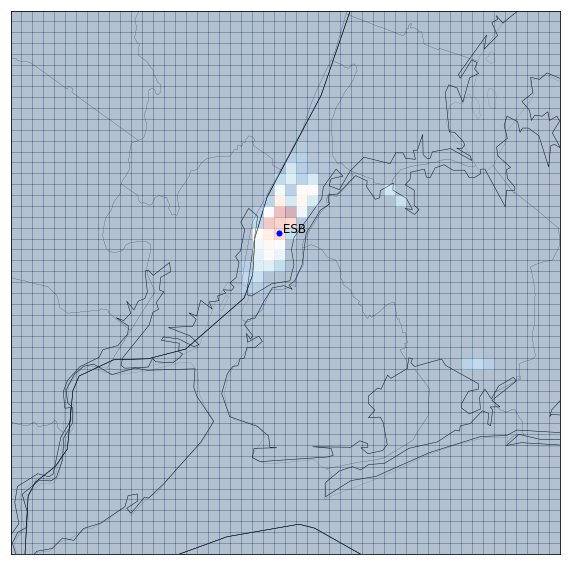

In [8]:
west, south, east, north = -74.26, 40.50, -73.70, 40.92
 
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111)
 
m = Basemap(projection='merc', llcrnrlat=south, urcrnrlat=north,llcrnrlon=west, urcrnrlon=east, lat_ts=south, resolution='h')


lon = -73.98603 
lat = 40.74853
x1,y1 = m(lon, lat)
plt.plot(x1, y1, 'bo', markersize=5)
plt.text(x1, y1, ' ESB', fontsize=12);

#m.etopo(scale=0.5, alpha=0.5)
m.drawcoastlines(linewidth=0.5)
#m.shadedrelief()
m.drawcounties()
m.drawstates()
m.drawrivers()

x = np.linspace(m.llcrnrx, m.urcrnrx, 51)
y = np.linspace(m.llcrnry, m.urcrnry, 51)
xx, yy = np.meshgrid(x, y)
z = np.array(rides_sum).reshape(50,50).T

m.pcolormesh(xx, yy, z, alpha=0.3, shading='Flat', cmap='RdBu_r', zorder=2)

### 2.-3.-2 Static map of New York #2 - Another way to visualize things

In [9]:
data = pd.read_pickle('yellow_tripdata_2016-05_cleaned.pkl')

In [10]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,tpep_pickup_hrs,region
0,1,2016-05-01 00,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,N,-73.983986,...,1,15.0,0.5,0.5,1.50,0.0,0.3,17.80,0.0,1233.0
1,2,2016-05-01 00,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,N,-73.975700,...,1,7.5,0.5,0.5,0.88,0.0,0.3,9.68,0.0,1180.0
2,2,2016-05-01 00,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,N,-73.980995,...,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36,0.0,1180.0
3,2,2016-05-01 00,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,N,-74.002258,...,1,17.0,0.5,0.5,3.66,0.0,0.3,21.96,0.0,1173.0
4,2,2016-05-01 00,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,N,-73.997498,...,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76,0.0,1130.0


c:\users\akuritsyn\appdata\local\continuum\anaconda2\lib\site-packages\mpl_toolkits\basemap\__init__.py:3459: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
c:\users\akuritsyn\appdata\local\continuum\anaconda2\lib\site-packages\mpl_toolkits\basemap\__init__.py:3472: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


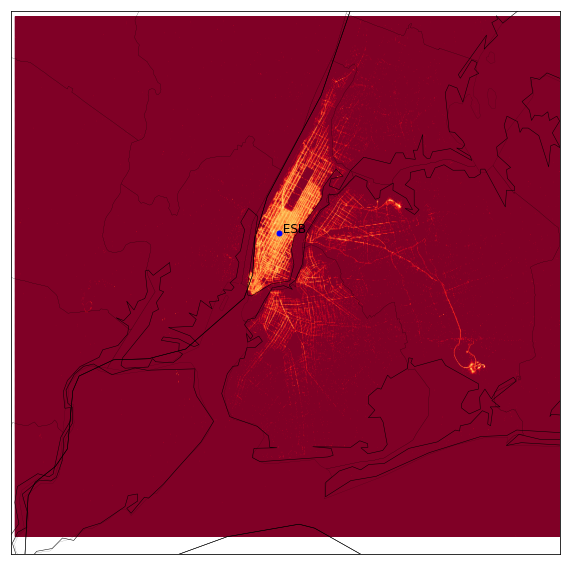

In [11]:
west, south, east, north = -74.26, 40.50, -73.70, 40.92
 
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111)
 
m = Basemap(projection='merc', llcrnrlat=south, urcrnrlat=north,llcrnrlon=west, urcrnrlon=east, lat_ts=south, resolution='h')


lon = -73.98603 
lat = 40.74853
x1,y1 = m(lon, lat)
plt.plot(x1, y1, 'bo', markersize=5)
plt.text(x1, y1, ' ESB', fontsize=12);

#m.etopo(scale=0.5, alpha=0.5)
m.drawcoastlines(linewidth=0.5)
#m.shadedrelief()
m.drawcounties()
m.drawstates()
m.drawrivers()

x, y = m(data['pickup_longitude'].values, data['pickup_latitude'].values)
m.hexbin(x,y, gridsize=1000,bins='log', cmap=cm.YlOrRd_r);

### One can clearly see two clusters outside of Manhattan corresponding to JFK and LaGuardia airports

### 4.-6. Interactive map of New York 

In [14]:
locations=zip((coords.north+coords.south)/2.,(coords.west+coords.east)/2.)

In [15]:
rides_mean=df.groupby('Region')['Count'].mean()

In [18]:
import gmaps
import gmaps.datasets
gmaps.configure(api_key="AI...") # Your Google API key

fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(locations,weights=rides_mean,max_intensity=50))
markers = gmaps.marker_layer([(40.6892, -74.0445)],info_box_content='Statue of Liberty')
fig.add_layer(markers)
fig

In [17]:
print 'Number of cells with average rides per hour more than 5:', sum(rides_mean>5.)

Number of cells with average rides per hour more than 5: 102


### The map does not get saved properly in html and will be saved separately as well.